In [1]:
%matplotlib inline

Utilities for reading Pycroscopy HDF5 files
============================================
Suhas Somnath

4/18/2018

Introduction
-------------
Pycroscopy uses a data-centric approach to data analysis and processing meaning that results from all data analysis and processing are written to the same h5 file that contains the recorded measurements. The Hierarchical Data Format (HDF5) allows data, whether it is raw measured data or results of analysis, to be stored in multiple datasets within the same file in a tree-like manner. Certain rules and considerations have been made in pycroscopy to ensure consistent and easy access to any data. 

The h5py python package provides great functions to create, read, and manage data in HDF5 files. In pycroscopy.hdf_utils, we have added functions that facilitate scientifically relevant, or pycroscopy specific functionality such as checking if a dataset is a Main dataset, reshaping to / from the original N dimensional form of the data, etc. Due to the wide breadth of the functions in hdf_utils, the guide for hdf_utils will be split in two parts - one that focuses on functions that facilitate reading and one that facilitate writing of data. The following guide provides examples of how, and more importantly when, to use functions in pycroscopy.hdf_utils for various scenarios. 

Recommended pre-requisite reading
---------------------------------
* pycroscopy data format - https://pycroscopy.github.io/pycroscopy/data_format.html.
* Crash course on HDF5 and h5py - 

Import all necessary packages
-----------------------------

Before we begin demonstrating the numerous functions in pycroscopy.hdf_utils, we need to import the necessary packages. Here are a list of packages besides pycroscopy that will be used in this example:
* h5py - to open and close the file
* wget - to download the example data file
* numpy - for numerical operations on arrays in memory
* matplotlib - basic visualization of data

In [1]:
from __future__ import print_function, division, unicode_literals
import os
# Warning package in case something goes wrong
from warnings import warn
# Package for downloading online files:
try:
    # This package is not part of anaconda and may need to be installed.
    import wget
except ImportError:
    warn('wget not found.  Will install with pip.')
    import pip
    pip.main(['install', 'wget'])
    import wget
import h5py
import numpy as np
import matplotlib.pyplot as plt
# Finally import pycroscopy.
try:
    import pycroscopy as px
except ImportError:
    warn('pycroscopy not found.  Will install with pip.')
    import pip
    pip.main(['install', 'pycroscopy'])
    import pycroscopy as px

C:\Users\Suhas\PycharmProjects\pycroscopy\pycroscopy\__init__.py:25: UserWarning: You are using the unity_dev branch, which is aimed at a 1.0 release for pycroscopy. Be advised - this branch changes very significantly and frequently. It is therefore not meant for usage. Use the master or dev branches for regular purposes.
  warn('You are using the unity_dev branch, which is aimed at a 1.0 release for pycroscopy. '


Load the dataset
=========================================
In order to demonstrate the many functions in hdf_utils, we will be using an pycroscopy HDF5 data file generated from an atomic force microscope containing real experimental data and some analysis results. First, let us download this file from the pycroscopy Github project:

In [ ]:
# Downloading the example file from the pycroscopy Github project
url = 'https://raw.githubusercontent.com/pycroscopy/pycroscopy/master/data/BEPS_small.h5'
h5_path = 'temp.h5'
_ = wget.download(url, h5_path)

print('Working on:\n' + h5_path)

Next, lets open this HDF5 file in read-only mode. Note that opening the file does not cause the contents to be automatically loaded to memory. Instead, we are presented with objects that refer to specific HDF5 datasets, attributes or groups in the file

In [2]:
# Open the file in read-only mode
h5_path = 'temp.h5'
h5_f = h5py.File(h5_path, mode='r')
# Here, h5_f is an active handle to the open file

Inspect the contents of this h5 data file
=========================================

The file contents are stored in a tree structure, just like files on a contemporary computer. The file contains
datagroups (similar to file folders) and datasets (similar to spreadsheets).
There are several datasets in the file and these store:

* The actual measurement collected from the experiment
* Spatial location on the sample where each measurement was collected
* Information to support and explain the spectral data collected at each location
* Since pycroscopy stores results from processing and analyses performed on the data in the same file, these
  datasets and datagroups are present as well
* Any other relevant ancillary information

print_tree()
------------
Soon after opening any file, it is often of interest to list the contents of the file. While one can use the open
source software HDFViewer developed by the HDF organization, pycroscopy.hdf_utils also has a very handy function - print_tree() to quickly visualize all the datasets and datagroups within the file within python.

In [3]:
print('Contents of the H5 file:')
px.hdf_utils.print_tree(h5_f)

Contents of the H5 file:
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Mean_Spectrogram
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Mean_Spectrogram
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices


By default, print_tree() presents a clean tree view of the contents of the group. Alternatively, it can print the full paths of each dataset and datagroup by setting the 'full_paths' keyword argument. print_tree() could also be used to display the contents of and HDF5 group instead of complete HDF5 file as we have done above. Lets configure it to print the relative paths of all objects within the Channel_000 group:

In [4]:
px.hdf_utils.print_tree(h5_f['/Measurement_000/Channel_000/'], rel_paths=True)

/Measurement_000/Channel_000
Bin_FFT
Bin_Frequencies
Bin_Indices
Bin_Step
Bin_Wfm_Type
Excitation_Waveform
Noise_Floor
Position_Indices
Position_Values
Raw_Data
Raw_Data-SHO_Fit_000
Raw_Data-SHO_Fit_000/Fit
Raw_Data-SHO_Fit_000/Guess
Raw_Data-SHO_Fit_000/Spectroscopic_Indices
Raw_Data-SHO_Fit_000/Spectroscopic_Values
Spatially_Averaged_Plot_Group_000
Spatially_Averaged_Plot_Group_000/Bin_Frequencies
Spatially_Averaged_Plot_Group_000/Mean_Spectrogram
Spatially_Averaged_Plot_Group_000/Spectroscopic_Parameter
Spatially_Averaged_Plot_Group_000/Step_Averaged_Response
Spatially_Averaged_Plot_Group_001
Spatially_Averaged_Plot_Group_001/Bin_Frequencies
Spatially_Averaged_Plot_Group_001/Mean_Spectrogram
Spatially_Averaged_Plot_Group_001/Spectroscopic_Parameter
Spatially_Averaged_Plot_Group_001/Step_Averaged_Response
Spectroscopic_Indices
Spectroscopic_Values
UDVS
UDVS_Indices


Finally, print_tree() can also be configured to only print Pycroscopy Main datasets besides Group objects using the 'main_dsets_only' option

In [6]:
px.hdf_utils.print_tree(h5_f, main_dsets_only=True)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------


Accessing Attributes
==================================

HDF5 datasets and datagroups can also store metadata such as experimental parameters. These metadata can be text,
numbers, small lists of numbers or text etc. These metadata can be very important for understanding the datasets
and guide the analysis routines.

While one could use the basic h5py functionality to access attributes, one would encounter a lot of problems when attempting to decode attributes whose values were strings or lists of strings due to some issues in h5py. This problem has been demonstrated in our primer to HDF5. Instead of using the basic functionality of h5py, we recommend always using the functions in pycroscopy that reliably and consistently work for any kind of attribute for any version of python: 

get_attributes()
----------------

get_attributes() is a very handy function that returns all or a specified set of attributes in an HDF5 object. If no attributes are explicitely requested, all attributes in the object are returned:

In [7]:
for key, val in px.hdf_utils.get_attributes(h5_f).items():
    print('{} : {}'.format(key, val))

Pycroscopy version : 0.0.a51
current_position_y : 4
sample_description : Thin Film
sample_name : PZT
project_name : Band Excitation
project_id : CNMS_2015B_X0000
current_position_x : 4
translator : ODF
user_name : John Doe
grid_size_y : 5
experiment_unix_time : 1503428472.2374
comments : Band Excitation data
experiment_date : 26-Feb-2015 14:49:48
instrument : cypher_west
data_tool : be_analyzer
xcams_id : abc
grid_size_x : 5
data_type : BEPSData
translate_date : 2017_08_22


get_attributes() is also great for only getting selected attributes. For example, if we only cared about the user and project related attributes, we could manually request for any that we wanted:

In [8]:
proj_attrs = px.hdf_utils.get_attributes(h5_f, ['project_name', 'project_id', 'user_name'])
for key, val in proj_attrs.items():
    print('{} : {}'.format(key, val))

project_name : Band Excitation
project_id : CNMS_2015B_X0000
user_name : John Doe


get_attr()
----------

If were sure that we only wanted a specific attribute, we could instead use get_attr() as:

In [9]:
print(px.hdf_utils.get_attr(h5_f, 'user_name'))

John Doe


check_for_matching_attrs()
--------------------------
Consider the scenario where we are have several HDF5 files or Groups or datasets and we wanted to check each one to see if they have the certain metadata / attributes. check_for_matching_attrs() is one very handy function that simplifies the comparision operation. 

For example, let us check if this file was authored by 'John Doe':

In [35]:
print(px.hdf_utils.check_for_matching_attrs(h5_f, new_parms={'user_name' : 'John Doe'}))

True


Finding datasets and groups
==================================

There are numerous ways to search for and access datasets and datagroups in H5 files using the basic functionalities of h5py. pycroscopy.hdf_utils contains several functions that simplify common searching / lookup operations as part of scientific workflows.

find_dataset()
----------------

The find_dataset() function will return alll datasets that whose names contain the provided string. In this case, we are looking for any datasets containing the string 'UDVS' in their names. If you look above, there are two datasets (UDVS and UDVS_Indices) that match this condition:

In [10]:
# This function returns all datasets that match even a portion of the name
udvs_dsets_2 = px.hdf_utils.find_dataset(h5_f, 'UDVS')
for item in udvs_dsets_2:
    print(item)

<HDF5 dataset "UDVS": shape (256, 7), type "<f4">
<HDF5 dataset "UDVS_Indices": shape (22272,), type "<u8">


As you might know by now, Pycroscopy HDF5 files contain three kinds of datasets:

* Main datasets that contain data recorded / computed at multiple spatial locations.
* Ancillary datasets that support a main dataset
* Other datasets

For more information, please refer to the documentation on the pycroscopy data format.

check_if_main()
---------------
check_if_main() is a very handy function that helps distinguish between Main datasets and other objects (Ancillary datasets, other datasets, Groups etc.). Lets apply this function to see which of the objects within the 'Channel_000' Group are Main datasets:

In [21]:
h5_chan_group = h5_f['Measurement_000/Channel_000']

# We will preprare two lists - one of objects that are main and one of objects that are not
non_main_objs = []
main_objs = []
for key, val in h5_chan_group.items():
    if px.hdf_utils.check_if_main(val):
        main_objs.append(key)
    else:
        non_main_objs.append(key)

# Now we simply print the names of the items in each list
print('Main Datasets:')
for item in main_objs:
    print(item)
print('\nObjects that were not Main datasets:')
for item in non_main_objs:
    print(item)

Main Datasets:
Raw_Data

Objects that were not Main datasets:
Bin_FFT
Bin_Frequencies
Bin_Indices
Bin_Step
Bin_Wfm_Type
Excitation_Waveform
Noise_Floor
Position_Indices
Position_Values
Raw_Data-SHO_Fit_000
Spatially_Averaged_Plot_Group_000
Spatially_Averaged_Plot_Group_001
Spectroscopic_Indices
Spectroscopic_Values
UDVS
UDVS_Indices


The above script allowed us to distinguish Main datasets from all other objects only within the Group named 'Channel_000'.

get_all_main()
--------------
What if we want to quickly find all Main datasets even within the sub-Groups of 'Channel_000'? To do this, we have a very handy function called - get_all_main():

In [24]:
main_dsets = px.hdf_utils.get_all_main(h5_chan_group)
for dset in main_dsets:
    print(dset)
    print('')

<HDF5 dataset "Raw_Data": shape (25, 22272), type "<c8">
located at: 
/Measurement_000/Channel_000/Raw_Data 
Data contains: 
[''] (['a']) 
Data dimensions and original shape: 
Position Dimensions: 
X - size: 5 
Y - size: 5 
Spectroscopic Dimensions: 
Frequency - size: 87 
DC_Offset - size: 64 
Field - size: 2 
Cycle - size: 2



The datasets above show that the file contains three main datasets. Two of these datasets are contained in a HDF5 Group
called "Raw_Data-SHO_Fit_000" meaning that they are results of an operation called "SHO_Fit" performed on the Main
dataset - "Raw_Data". The first of the three main datasets is indeed the "Raw_Data" dataset from which the latter
two datasets (Fit and Guess) were derived.

Pycroscopy allows the same operation, such as "SHO_Fit", to be performed on the same dataset (Raw_Data), multiple
times. Each time the operation is performed, a new datagroup is created to hold the new results. Often, we may
want to perform a few operations such as:

* Find the (source / main) dataset from which certain results were derived
* Check if a particular operation was performed on a main dataset
* Find all datagroups corresponding to a particular operation (e.g. - SHO_Fit) being applied to a main dataset

hdf_utils has a few handy functions for many of these use cases. 

find_results_groups()
----------------------
First, lets show that find_results_groups() finds all Groups containing the results of a "SHO_Fit" operation applied to "Raw_Data":

In [25]:
# First get the dataset corresponding to Raw_Data
h5_raw = h5_chan_group['Raw_Data']

operation = 'SHO_Fit'
print('Instances of operation "{}" applied to dataset named "{}":'.format(operation, h5_raw.name))
h5_sho_group_list = px.hdf_utils.find_results_groups(h5_raw, operation)
print(h5_sho_group_list)

Instances of operation "SHO_Fit" applied to dataset named "/Measurement_000/Channel_000/Raw_Data":
[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (4 members)>]


As expected, the "SHO_Fit" operation was performed on "Raw_Data" dataset only once, which is why find_results_groups() returned only one HDF5 Group - "SHO_Fit_000".

check_for_old()
-----------------

Often one may want to check if a certain operation was performed on a dataset with the very same parameters to
avoid recomputing the results. hdf_utils.check_for_old() is a very handy function that compares parameters (a dictionary) for a new / potential operation against the metadata (attributes) stored in each existing results group (HDF5 groups whose name starts with "Raw_Data-SHO_Fit" in this case). Before we demostrate check_for_old(), lets take a look at the attributes stored in the existing results groups:

In [30]:
print('Parameters already used for computing SHO_Fit on Raw_Data in the file:')
for key, val in px.hdf_utils.get_attributes(h5_chan_group['Raw_Data-SHO_Fit_000']).items():
    print('{} : {}'.format(key, val))

Parameters already used for computing SHO_Fit on Raw_Data in the file:
SHO_fit_method : pycroscopy BESHO
timestamp : 2017_08_22-15_02_08
SHO_guess_method : pycroscopy BESHO
machine_id : mac109728.ornl.gov


Now, let us check for existing results where the 'SHO_fit_method'  matches an existing value and a new value:

In [34]:
print('Checking to see if SHO Fits have been computed on the raw dataset:')
print('\nUsing "pycroscopy BESHO":')
print(px.hdf_utils.check_for_old(h5_raw, 'SHO_Fit',
                                 new_parms={'SHO_fit_method': 'pycroscopy BESHO'}))
print('\nUsing "alternate technique"')
print(px.hdf_utils.check_for_old(h5_raw, 'SHO_Fit',
                                 new_parms={'SHO_fit_method': 'alternate technique'}))

Checking to see if SHO Fits have been computed on the raw dataset:

Using "pycroscopy BESHO":
[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (4 members)>]

Using "alternate technique"
[]


Clearly, while find_results_groups() returned any and all groups corresponding to "SHO_Fit" being applied to "Raw_Data",
check_for_old() only returned the group(s) where the operation was performed using the same specified parameters ('sho_fit_method' in this case).

Note that check_for_old() performs two operations - search for all groups with the matching nomenclature and then compare the attributes. check_for_matching_attrs() is the handy function, that enables the latter operation of comparing a giving dictionary of parameters against attributes in a given object. 

get_source_dataset()
---------------------
hdf_utils.get_source_dataset() is a very handy function for the inverse scenario where we are interested in finding the source dataset from which the known result was derived:

In [29]:
h5_sho_group = h5_sho_group_list[0]
print('Datagroup containing the SHO fits:')
print(h5_sho_group)
print('\nDataset on which the SHO Fit was computed:')
h5_source_dset = px.hdf_utils.get_source_dataset(h5_sho_group)
print(h5_source_dset)

Datagroup containing the SHO fits:
<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (4 members)>

Dataset on which the SHO Fit was computed:
<HDF5 dataset "Raw_Data": shape (25, 22272), type "<c8">
located at: 
/Measurement_000/Channel_000/Raw_Data 
Data contains: 
[''] (['a']) 
Data dimensions and original shape: 
Position Dimensions: 
X - size: 5 
Y - size: 5 
Spectroscopic Dimensions: 
Frequency - size: 87 
DC_Offset - size: 64 
Field - size: 2 
Cycle - size: 2


Since the source dataset is always a Main dataset, get_source_dataset() results a PycroDataset object instead of a regular HDF5 Dataset object.

Note that hdf_utils.get_source_dataset() and find_results_groups() rely on the Pycroscopy rule that results of an operation be stored in a Group named "Source_Dataset_Name-Operation_Name_00x". 

get_auxillary_datasets()
-------------------------
The association of datasets and groups with one another provides a powerful mechanism for conveying (richer) information. One way to associate objects with each other is to store the reference of an object as an attribute of another. This is precisely the capability that is leveraged to turn Central datasets into Pycroscopy Datasets or PycroDatasets. PycroDatasets need to have four attributes that are references to the Position and Spectroscopic ancillary datasets. Note, that pycroscopy does not restrict or preclude the storage of other relevant datasets as attributes of another dataset.

For example, the 'Raw_Data' dataset appears to contain several attributes whose keys / names match the names of datasets we see above and values all appear to be HDF5 object references:

In [36]:
for key, val in px.hdf_utils.get_attributes(h5_raw).items():
    print('{} : {}'.format(key, val))

Bin_Indices : <HDF5 object reference>
Position_Indices : <HDF5 object reference>
Spectroscopic_Indices : <HDF5 object reference>
quantity : ['']
units : ['a']
Bin_Frequencies : <HDF5 object reference>
in_field_Plot_Group : <HDF5 region reference>
Bin_Step : <HDF5 object reference>
UDVS : <HDF5 object reference>
Excitation_Waveform : <HDF5 object reference>
UDVS_Indices : <HDF5 object reference>
Spectroscopic_Values : <HDF5 object reference>
out_of_field_Plot_Group : <HDF5 region reference>
Bin_Wfm_Type : <HDF5 object reference>
Position_Values : <HDF5 object reference>
Noise_Floor : <HDF5 object reference>
Bin_FFT : <HDF5 object reference>


As the name suggests, these HDF5 object references are references or addresses to datasets located elsewhere in the file. Conventionally, one would need to apply this reference to the file handle to get the actual HDF5 Dataset / Group object.  

get_auxillary_datasets() simplifies this process by directly retrieving the actual Dataset / Group associated with the attribute. Thus, we would be able to get a reference to the 'Bin_Frequencies' Dataset via:

In [38]:
h5_obj = px.hdf_utils.get_auxillary_datasets(h5_raw, 'Bin_Frequencies')[0]
print(h5_obj)
# Lets prove that this object is the same as the 'Bin_Frequencies' object that can be directly addressed:
print(h5_obj == h5_f['/Measurement_000/Channel_000/Bin_Frequencies'])

<HDF5 dataset "Bin_Frequencies": shape (87,), type "<f4">
True


Functions for handling Ancillary Datasets
=========================================

One of the major benefits of Pycroscopy is its ability to handle large multidimensional datasets at ease. Ancillary datasets serve as the keys or legends for explaining the dimensionality, reshapability, etc. of a dataset. There are several functions in hdf_utils that simplify many common operations on ancillary datasets. Before we dive into these functions, let us understand the dataset we are working on.

This scientific dataset
-----------------------

For this example, we will be working with a Band Excitation Polarization Switching (BEPS) dataset acquired from
advanced atomic force microscopes. In the much simpler Band Excitation (BE) imaging datasets, a single spectra is
acquired at each location in a two dimensional grid of spatial locations. Thus, BE imaging datasets have two
position dimensions (X, Y) and one spectroscopic dimension (frequency - against which the spectra is recorded).
The BEPS dataset used in this example has a spectra for each combination of three other parameters (DC offset,
Field, and Cycle). Thus, this dataset has three new spectral dimensions in addition to the spectra itself. Hence,
this dataset becomes a 2+4 = 6 dimensional dataset

Before we demonstrate the several useful functions in hdf_utils, lets access the position and spectroscopic ancillary datasets using the get_auxillary_datasets() function we used above:

In [40]:
dset_list = px.hdf_utils.get_auxillary_datasets(h5_raw, ['Position_Indices', 'Position_Values', 
                                                         'Spectroscopic_Indices', 'Spectroscopic_Values'])
h5_pos_inds, h5_pos_vals, h5_spec_inds, h5_spec_vals = dset_list

get_formatted_labels()
----------------------
get_formatted_labels() provides a string representation of the dimensions represented by an ancillary dataset. Lets try it out on the Position Indices and Spectroscopic Indices datasets:

In [45]:
pos_dim_names = px.hdf_utils.get_formatted_labels(h5_pos_inds)
spec_dim_names = px.hdf_utils.get_formatted_labels(h5_spec_inds)

print('Position dimensions are:')
print(pos_dim_names)
print('\nSpectroscopic dimensions are:')
print(spec_dim_names)

Position dimensions are:
['X (m)', 'Y (m)']

Spectroscopic dimensions are:
['Frequency (Hz)', 'DC_Offset (V)', 'Field ()', 'Cycle ()']


As mentioned above, this is indeed a six dimensional dataset with two position dimensions and four spectroscopic dimensions. The Field and Cycle dimensions do not have any units since they are dimensionless unlike the other dimensions.

get_dimensionality()
---------------------
Now lets find out the number of steps in each of those dimensions using another handy function called get_dimensionality()

In [47]:
pos_dim_sizes = px.hdf_utils.get_dimensionality(h5_pos_inds)
spec_dim_sizes = px.hdf_utils.get_dimensionality(h5_spec_inds)

print('Size of each Position dimension:')
for name, length in zip(pos_dim_names, pos_dim_sizes):
    print('{} : {}'.format(name, length))
print('\nSize of each Spectroscopic dimension:')
for name, length in zip(spec_dim_names, spec_dim_sizes):
    print('{} : {}'.format(name, length))

Size of each Position dimension:
X (m) : 5
Y (m) : 5

Size of each Spectroscopic dimension:
Frequency (Hz) : 87
DC_Offset (V) : 64
Field () : 2
Cycle () : 2


get_sort_order()
----------------

In a few (rare) cases, the spectroscopic / position dimensions are not arranged in descending order of rate of change.
In other words, the dimensions in these ancillary matrices are not arranged from fastest-varying to slowest.
To account for such discrepancies, hdf_utils has a very handy function that goes through each of the columns or
rows in the ancillary indices matrices and finds the order in which these dimensions vary.

Below we illustrate an example of sorting the names of the spectroscopic dimensions from fastest to slowest in
a BEPS data file:

In [71]:
spec_sort_order = px.hdf_utils.get_sort_order(h5_spec_inds)
print('Rate of change of spectroscopic dimensions: {}'.format(spec_sort_order))
print('\nSpectroscopic dimensions arranged as is:')
unsorted_spec_labels = px.hdf_utils.get_formatted_labels(h5_spec_inds)
print(unsorted_spec_labels)
sorted_spec_labels = np.array(unsorted_spec_labels)[np.array(spec_sort_order)]
print('\nSpectroscopic dimensions arranged from fastest to slowest')
print(sorted_spec_labels)

Rate of change of spectroscopic dimensions: [0 2 1 3]

Spectroscopic dimensions arranged as is:
['Frequency (Hz)', 'DC_Offset (V)', 'Field ()', 'Cycle ()']

Spectroscopic dimensions arranged from fastest to slowest
['Frequency (Hz)' 'Field ()' 'DC_Offset (V)' 'Cycle ()']


get_unit_values()
-----------------

When visualizing the data it is essential to plot the data against appropriate values on the X, Y, Z axes.
Extracting a simple list or array of values to plot against may be challenging especially for multidimensional
dataset such as the one under consideration. Fortunately, hdf_utils has a very handy function for this as well:

In [72]:
pos_unit_values = px.hdf_utils.get_unit_values(h5_pos_inds, h5_pos_vals)
print('Position unit values:')
for key, val in pos_unit_values.items():
    print('{} : {}'.format(key, val))
spec_unit_values = px.hdf_utils.get_unit_values(h5_spec_inds, h5_spec_vals)

Position unit values:
Y : [0. 1. 2. 3. 4.]
X : [0. 1. 2. 3. 4.]


Since the spectroscopic dimensions are far more complicated, lets visualize the results from get_unit_values():

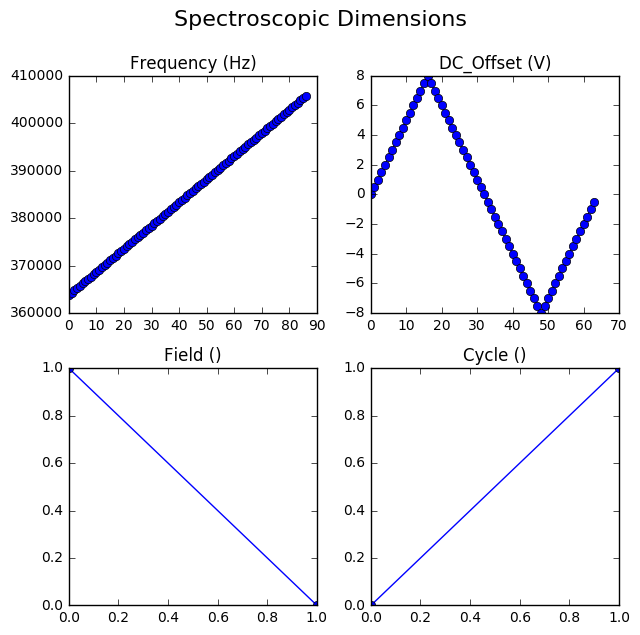

In [78]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(6.5, 6))
for axis, name in zip(axes.flat, spec_dim_names):
    axis.set_title(name)
    name, units = name.split()
    axis.plot(spec_unit_values[name], 'o-')
    
fig.suptitle('Spectroscopic Dimensions', fontsize=16, y=1.05)
fig.tight_layout()

Reshaping Data
==============

reshape_to_n_dims()
-------------------

Pycroscopy stores N dimensional datasets in a flattened 2D form of position x spectral values. It can become challenging to retrieve the data in its original N-dimensional form, especially for multidimensional datasets such as the one we are working on. Fortunately, all the information regarding the dimensionality of the dataset are contained in the spectral and position ancillary datasets. reshape_to_n_dims() is a very useful function that can help retrieve the N-dimensional form of the data using a simple function call:

In [75]:
ndim_form, success, labels = px.hdf_utils.reshape_to_n_dims(h5_raw, get_labels=True)
if success:
    print('Succeeded in reshaping flattened 2D dataset to N dimensions')
    print('Shape of the data in its original 2D form')
    print(h5_raw.shape)
    print('Shape of the N dimensional form of the dataset:')
    print(ndim_form.shape)
    print('And these are the dimensions')
    print(labels)
else:
    print('Failed in reshaping the dataset')

Succeeded in reshaping flattened 2D dataset to N dimensions
Shape of the data in its original 2D form
(25, 22272)
Shape of the N dimensional form of the dataset:
(5, 5, 87, 64, 2, 2)
And these are the dimensions
['X' 'Y' 'Frequency' 'DC_Offset' 'Field' 'Cycle']


reshape_from_n_dims()
-----------------------
The inverse problem of reshaping an N dimensional dataset back to a 2D dataset (let's say for the purposes of multivariate analysis or storing into Pycroscopy formatted HDF5 files) is also easily solved using another handy function - reshape_from_n_dims():

In [77]:
two_dim_form, success = px.hdf_utils.reshape_from_n_dims(ndim_form,
                                                        h5_pos=h5_pos_inds,
                                                        h5_spec=h5_spec_inds)
if success:
    print('Shape of flattened two dimensional form')
    print(two_dim_form.shape)
else:
    print('Failed in flattening the N dimensional dataset')

Shape of flattened two dimensional form
(25, 22272)


In [ ]:
# Close and delete the h5_file
h5_f.close()
os.remove(h5_path)